In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn import datasets
digits = datasets.load_digits()

In [2]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [4]:
from sklearn.model_selection import train_test_split

In [186]:
train_X, test_X , trian_y,test_y = train_test_split(digits.data,digits.target,test_size = 0.1)
from sklearn.neighbors import KNeighborsClassifier
Knn = KNeighborsClassifier(6)
Knn.fit(train_X,trian_y)
predict = Knn.predict(test_X)
np.sum(predict == test_y)/len(test_y)

0.9666666666666667

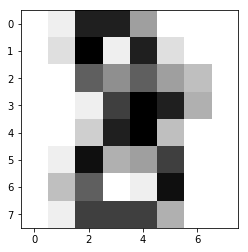

8


In [38]:
n = np.random.randint(0,len(digits.target),1)[0]
some_digit = digits.data[n].reshape(8,-1)
plt.imshow(some_digit,cmap = matplotlib.cm.binary)
plt.show()
print(digits.target[n])

In [169]:
Knn.score(test_X,test_y)

0.9888888888888889

In [170]:
from sklearn.metrics import accuracy_score
accuracy_score(test_y,predict)

0.9888888888888889

1: 0.9887777777777778
2: 0.9863333333333334
3: 0.9880555555555556
4: 0.9866111111111112
5: 0.9862777777777778
6: 0.9844444444444445
7: 0.9831111111111112
8: 0.9833333333333334
9: 0.9821666666666666
10: 0.9814444444444443
11: 0.9814444444444446
12: 0.9812222222222221
13: 0.9826111111111112
14: 0.9802777777777776
15: 0.9787777777777776
16: 0.9775555555555553
17: 0.9783333333333336
18: 0.977222222222222
19: 0.9735555555555554
20: 0.9758333333333334
21: 0.9726111111111111
22: 0.9743333333333334
23: 0.9718333333333332
24: 0.9694444444444441
25: 0.9714999999999999
26: 0.9695
27: 0.9683888888888887
28: 0.9658333333333331
29: 0.9665555555555554
30: 0.9662222222222221
31: 0.9661666666666665
32: 0.965611111111111
33: 0.9652222222222221
34: 0.9642222222222222
35: 0.9640555555555557
36: 0.9664999999999998
37: 0.9615555555555555
38: 0.9642777777777777
39: 0.9628333333333333
40: 0.9601666666666666
41: 0.9613333333333332
42: 0.9626111111111109
43: 0.9588333333333334
44: 0.9577222222222223
45: 0.95688

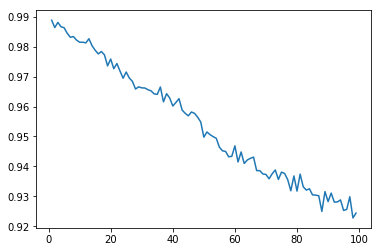

In [173]:
allres = []
for i in range(1,100):
    res = []
    for j in range(100):
        train_X, test_X , trian_y,test_y = train_test_split(digits.data,digits.target,test_size = 0.1)
        Knn = KNeighborsClassifier(i)
        Knn.fit(train_X,trian_y)
        res.append(Knn.score(test_X, test_y))
    res = np.array(res)
    allres.append(res.mean())
    print("{}: {}".format(i, allres[-1]))
allres = np.array(allres)
plt.plot(np.arange(1,100),allres)


1: 0.9868611111111109
2: 0.9839999999999999
3: 0.9859166666666667
4: 0.9838611111111111
5: 0.9850555555555556
6: 0.9822777777777776
7: 0.9831944444444443
8: 0.9815833333333334
9: 0.9820277777777777


ValueError: x and y must have same first dimension, but have shapes (99,) and (9,)

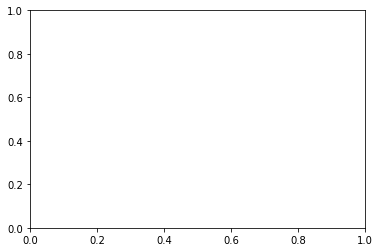

In [174]:
allres = []
for i in range(1,10):
    res = []
    for j in range(100):
        train_X, test_X , trian_y,test_y = train_test_split(digits.data,digits.target,test_size = 0.2,random_state = j)
        Knn = KNeighborsClassifier(i)
        Knn.fit(train_X,trian_y)
        res.append(Knn.score(test_X, test_y))
    res = np.array(res)
    allres.append(res.mean())
    print("{}: {}".format(i, allres[-1]))
allres = np.array(allres)
plt.plot(np.arange(1,10),allres)


1: 0.9868611111111109
2: 0.9868888888888887
3: 0.9863888888888888
4: 0.9857777777777776
5: 0.9850833333333334
6: 0.9848333333333332
7: 0.9835277777777778
8: 0.9833611111111111
9: 0.9830277777777777


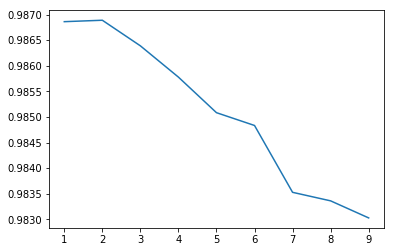

In [178]:
allres = []
for i in range(1,10):
    res = []
    for j in range(100):
        train_X, test_X , trian_y,test_y = train_test_split(digits.data,digits.target,test_size = 0.2,random_state = j)
        Knn = KNeighborsClassifier(i, weights = "distance")
        Knn.fit(train_X,trian_y)
        res.append(Knn.score(test_X, test_y))
    res = np.array(res)
    allres.append(res.mean())
    print("{}: {}".format(i, allres[-1]))
allres = np.array(allres)
plt.plot(np.arange(1,10),allres)


In [180]:
allres = []
for i in range(1,10):
    res = []
    for j in range(100):
        for k in range(1, 5):
            train_X, test_X , trian_y,test_y = train_test_split(digits.data,digits.target,test_size = 0.2,random_state = j)
            Knn = KNeighborsClassifier(i, weights = "distance", p = k)
            Knn.fit(train_X,trian_y)
            res.append(Knn.score(test_X, test_y))
    res = np.array(res)
    allres.append(res.mean())
    print("{}: {}".format(i, allres[-1]))
allres = np.array(allres)
plt.plot(np.arange(1,10),allres)


1: 0.9856944444444443
2: 0.9857777777777779
3: 0.9849097222222221


KeyboardInterrupt: 

In [197]:
param_grid = [{"weights" : ['uniform'],"n_neighbors" : [i for i in range(1,11)]},
              {"weights" : ['distance'],"n_neighbors" : [i for i in range(1,11)], "p":[i for i in range(1,6)]}]
knn = KNeighborsClassifier()
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(knn, param_grid,n_jobs=-1)

In [198]:
%time grid_search.fit(train_X, trian_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 57.9 s


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [189]:
%time grid_search.fit(train_X, trian_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


Wall time: 3min 56s


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4, 5]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [190]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [192]:
grid_search.best_score_

0.9882498453927026